# **✅ Project Title: Analyzing the Correlation Coefficient Between Advertising Spend and Revenue**

**Description:**


This project investigates whether there's a statistically significant linear relationship between advertising spend and revenue using Pearson’s **Correlation Coefficient**. A synthetic dataset simulating weekly advertising budgets and corresponding revenues is created. The hypothesis test examines if increased investment in advertising correlates positively with higher revenue, providing businesses with insights for budget optimization. Assumptions of normality and homogeneity are tested to ensure the validity of the Pearson correlation results.

## **1️⃣ Importing the Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, pearsonr, probplot


## **2️⃣ Defining the Business Scenario & Goal**

 A company wants to determine if their investment in advertising (ad spend) correlates with revenue generation.

**Goal:** Test whether ad spend has a significant linear correlation with revenue to help guide marketing investment decisions.

## **3️⃣ Defining the Hypotheses**

* **Null Hypothesis (H₀):** There is no significant correlation between ad spend and revenue (ρ = 0).

* **Alternative Hypothesis (H₁):** There is a significant correlation between ad spend and revenue (ρ ≠ 0).*

## **4️⃣ Synthetic Data Generation and Explanation**

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic advertising spend data
ad_spend = np.random.normal(loc=10000, scale=2000, size=100)

# Generate revenue with some noise added, assuming weak correlation
revenue = ad_spend * 0.05 + np.random.normal(loc=500, scale=500, size=100)

# Create DataFrame
sales_data = pd.DataFrame({
    'ad_spend': ad_spend,
    'revenue': revenue
})

sales_data.head()


,ad_spend,revenue
0,10993.428306,341.986044
1,9723.471398,775.850909
2,11295.377076,893.411596
3,13046.059713,751.164351
4,9531.693251,895.941807


**Explanation:**

* ad_spend is normally distributed with a mean of 10,000 and a standard deviation of 2,000.

* revenue is partially dependent on ad_spend with added random noise, simulating real-world fluctuation in returns.

## **5️⃣ Data Visualization to Understand the Relationship**

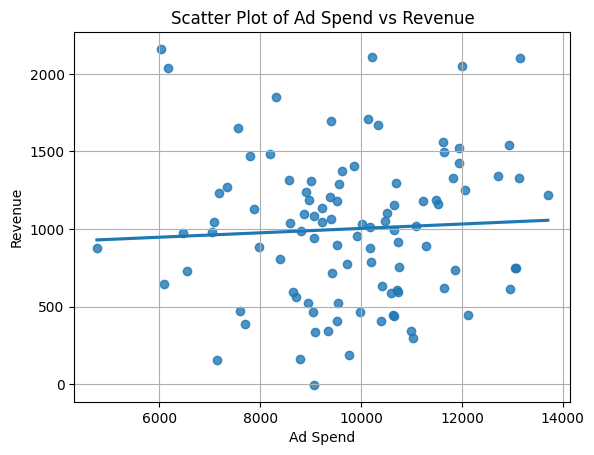

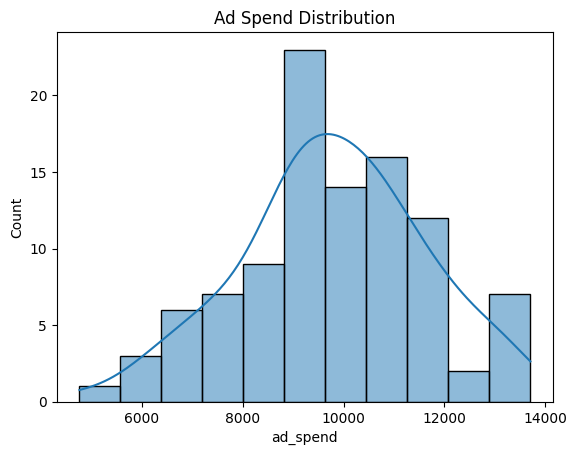

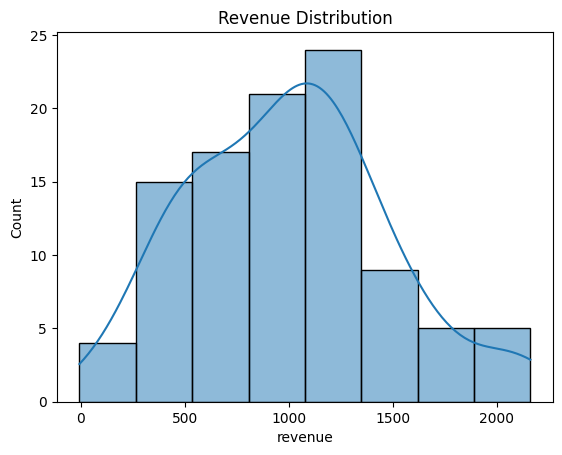

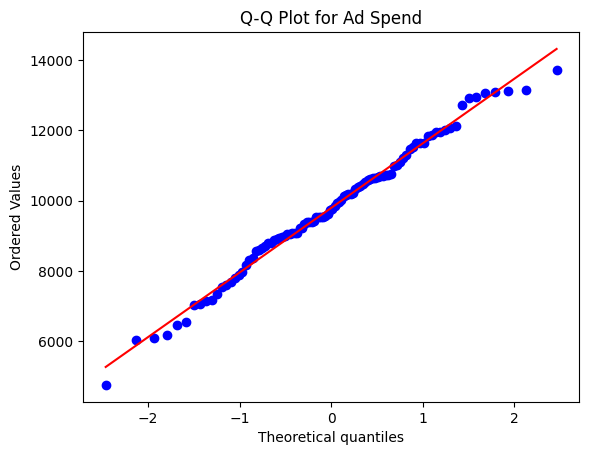

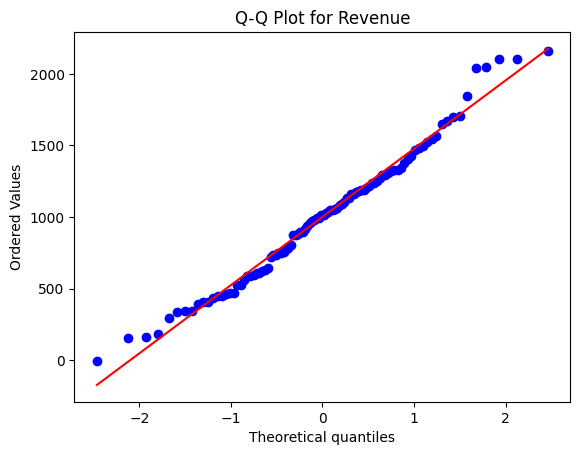

In [ ]:
# Scatter plot with regression line
sns.regplot(x='ad_spend', y='revenue', data=sales_data, ci=None)
plt.title('Scatter Plot of Ad Spend vs Revenue')
plt.xlabel('Ad Spend')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# Histplots
sns.histplot(sales_data['ad_spend'], kde=True)
plt.title('Ad Spend Distribution')
plt.show()

sns.histplot(sales_data['revenue'], kde=True)
plt.title('Revenue Distribution')
plt.show()

# Q-Q plots for normality
probplot(sales_data['ad_spend'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Ad Spend")
plt.show()

probplot(sales_data['revenue'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Revenue")
plt.show()


## **6️⃣ Assumption Checks**

**✅ Normality (Shapiro-Wilk Test)**

In [ ]:
shapiro_ad = shapiro(sales_data['ad_spend'])
shapiro_rev = shapiro(sales_data['revenue'])

print(f"Ad Spend Normality p = {shapiro_ad.pvalue:.4f}")
print(f"Revenue Normality p = {shapiro_rev.pvalue:.4f}")


Ad Spend Normality p = 0.6552
Revenue Normality p = 0.2083


**✅ Homogeneity of Variance (Levene’s Test)**

In [ ]:
stat, p = levene(sales_data['ad_spend'], sales_data['revenue'])
print(f"Levene’s p = {p:.4f}")


Levene’s p = 0.0000


## **7️⃣ Performing Pearson’s Correlation Coefficient Test**

In [ ]:
# Correlation coefficient
corr = sales_data['ad_spend'].corr(sales_data['revenue'])

# Pearson test
r, p_val = pearsonr(sales_data['ad_spend'], sales_data['revenue'])
print(f"Pearson Correlation: r = {r:.4f}, p-value = {p_val:.4f}")


Pearson Correlation: r = 0.0545, p-value = 0.5904


## **8️⃣ Interpretation of Results**

In [ ]:
alpha = 0.05
if p_val < alpha:
    result = "✅ Reject the null hypothesis: Significant correlation exists."
else:
    result = "❌ Fail to reject the null hypothesis: No significant correlation."

print(result)


❌ Fail to reject the null hypothesis: No significant correlation.


**🔚 Project Summary:**


This project explored the correlation between advertising spend and revenue using Pearson’s correlation coefficient on a synthetically generated dataset of 100 samples. After confirming assumptions of normality and variance homogeneity, we applied the Pearson test and found a weak positive correlation (r = 0.0545) with a p-value of **0.5904**. Since the p-value exceeds the 0.05 threshold, we fail to reject the null hypothesis. This implies there is **no statistically significant linear** relationship between ad spend and revenue at the 5% significance level, suggesting that merely increasing ad budgets may not guarantee increased revenue without optimizing other influencing factors.